# Data visualisation with python

We will start creating simple plots with a simple dataset — the famous "Titanic" survivalship data, which we can directly load using the Seaborn library:

In [1]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


The `countplot()` allows you to create bar charts of value counts in a column without having to aggregate the data beforehand:

(Note: the object containing a plot is typically called "ax", hence the name of the variable)

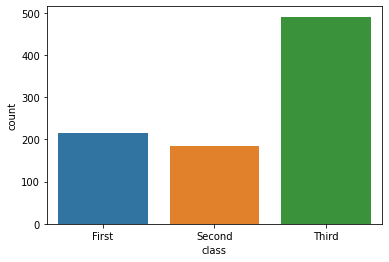

In [2]:
ax = sns.countplot(x="class", data=titanic)

You can quickly change the style of the plot with `set_style()`, and the colors of the bars with the argument `palette`:

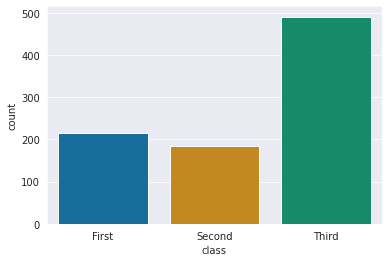

In [3]:
sns.set_style("darkgrid") # try whitegrid, dark, white, and ticks
ax = sns.countplot(x="class", 
                   data=titanic,
                   palette="colorblind" # try deep, muted, pastel, bright, dark, and colorblind
                   )

Find more about configuring aesthetics of seaborn plots here: https://seaborn.pydata.org/tutorial/aesthetics.html

More about color palettes here: https://seaborn.pydata.org/tutorial/color_palettes.html

The argument `hue` stands for "color", and it allows us to create the same plot across another dimension of the dataframe:

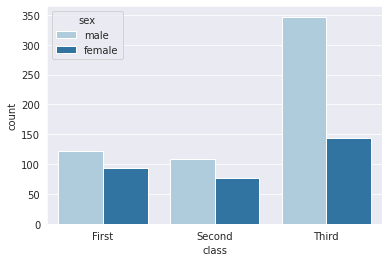

In [4]:
ax = sns.countplot(x="class",
                   hue="sex",
                   data=titanic,
                   palette="Paired"
                   )

Using `ax.set()` you can access other aesthetical elements of the plot, for example the axis labels or the "tick" labels:

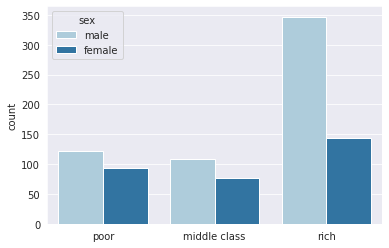

In [5]:
ax = sns.countplot(x="class", 
                   hue="sex",
                   data=titanic,
                   palette="Paired"
                   )

ax.set(xlabel=None,
       xticklabels=["poor", "middle class", "rich"]);

**Exercise:** 

1. Create a plot that displays, using bars, how many survived or did not survive in the Titanic accident:

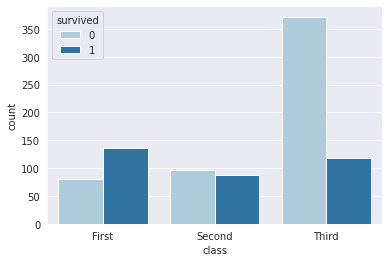

In [6]:
# code here

ax = sns.countplot(x="class",
                   hue="survived",
                   data=titanic,
                   palette="Paired"
                   )

Visualizing the relationship between two numerical variables with a scatterplot is easy using `sns.relplot()`.

Docs here: https://seaborn.pydata.org/tutorial/relational.html

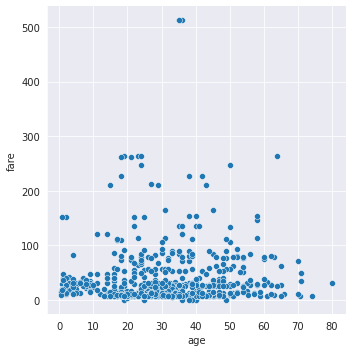

In [7]:
ax = sns.relplot(x="age",
                 y="fare",
                 data=titanic)

Similarly to `countplot()`, you can add additional variables with other visual elements, such as the colot (`hue`) or the `style`:

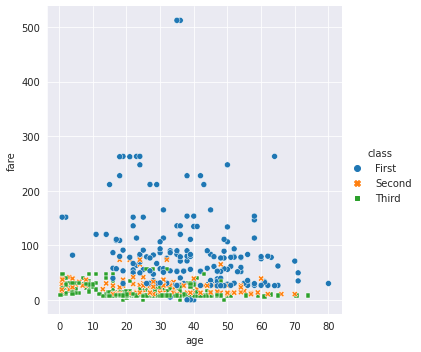

In [8]:
ax = sns.relplot(x="age",
                 y="fare",
                 hue="class",
                 style="class",
                 data=titanic)

Let's import now the Eniac clean datasets and build some plots with them:

In [9]:
# do not display the number with scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [10]:
# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

Transform to date format the columns from orders and orderlines:

In [11]:
orderlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293743 entries, 0 to 293742
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                293743 non-null  int64  
 1   id_order          293743 non-null  int64  
 2   product_id        293743 non-null  int64  
 3   product_quantity  293743 non-null  int64  
 4   sku               293743 non-null  object 
 5   unit_price        293743 non-null  float64
 6   date              293743 non-null  object 
 7   total_price       293743 non-null  float64
 8   check_orders      293743 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 18.2+ MB


In [12]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [13]:
products['price'].mean()

667.3462680144115

## Company revenue

First I will need to filter only the orders that have a completed state: 

In [14]:
orders_compl = orders.query('state == "Completed"')

Before we create a visualisation, we always need to prepare our dataframe: 

In [15]:
p_df = (
orders_compl
    # create two new columns in our dataframe; year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_paid':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
p_df

,year,month,total_paid
0,2017,Apr,486962.21
1,2017,Aug,722055.81
2,2017,Dec,1897507.75
3,2017,Feb,623896.30
4,2017,Jan,1191437.34
5,2017,Jul,1127172.80
6,2017,Jun,690049.94
7,2017,Mar,115937.31
8,2017,May,646147.86
9,2017,Nov,2949487.12


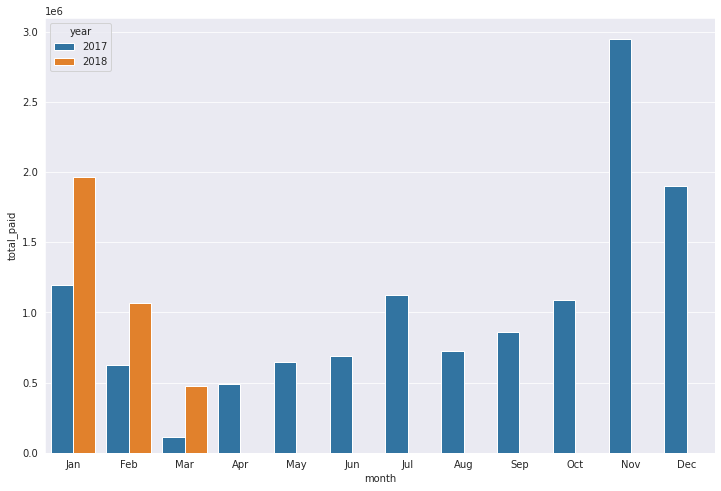

In [16]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)

Once we have the main plot, in this case `p`, we can add additional elements to it. For example, a horizontal line (using `axhline`).

We can also use `plt` to define other elements of the plot such as the title, the labels of the axis or the style:

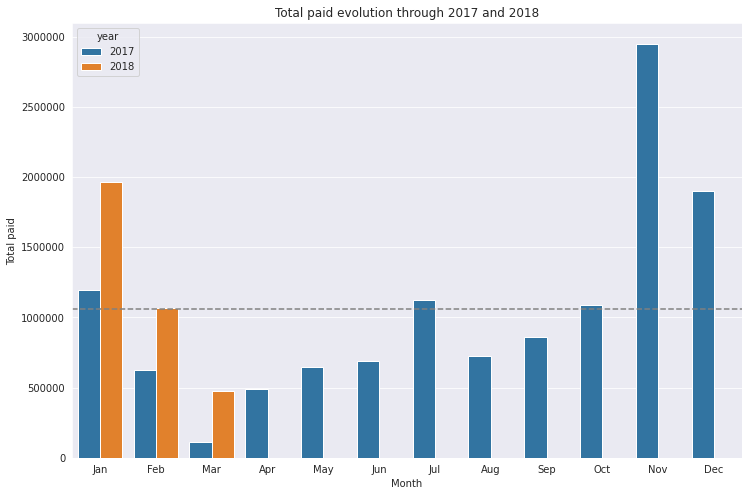

In [17]:
# our main plot
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=p_df, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_paid', # y values on our chart
    hue='year', # group color in our chart
    order=months # order x columns
)

# add a horizontal reference line into the chart to know where the mean value will be
p.axhline(
    p_df['total_paid'].mean(), # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray'
)

plt.xlabel('Month') # x label name
plt.ylabel('Total paid') # y label name
plt.title('Total paid evolution through 2017 and 2018') # title
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show() # show the plot

### Revenue distribution by order id

I would like to know more about the different values of `total_paid` for each order by month.

Let's talk more about this concept: 

In [18]:
p_df = (
orders_compl
    # create year and month
    .assign(year = orders['created_date'].dt.strftime('%Y'), 
           month = orders['created_date'].dt.strftime('%b'))
)
p_df

,order_id,created_date,total_paid,state,check_orders,year,month
1,241423,2017-11-06 13:10:02,136.15,Completed,True,2017,Nov
2,242832,2017-12-31 17:40:03,15.76,Completed,True,2017,Dec
3,243330,2017-02-16 10:59:38,84.98,Completed,True,2017,Feb
5,245275,2017-06-28 11:35:37,149.00,Completed,True,2017,Jun
6,245595,2017-01-21 12:52:47,112.97,Completed,True,2017,Jan
...,...,...,...,...,...,...,...
204403,527042,2018-03-14 11:47:50,18.98,Completed,True,2018,Mar
204423,527070,2018-03-14 11:50:48,24.97,Completed,True,2018,Mar
204426,527074,2018-03-14 11:51:42,24.97,Completed,True,2018,Mar
204444,527096,2018-03-14 11:58:40,34.96,Completed,True,2018,Mar


If we create a barplot directly: 

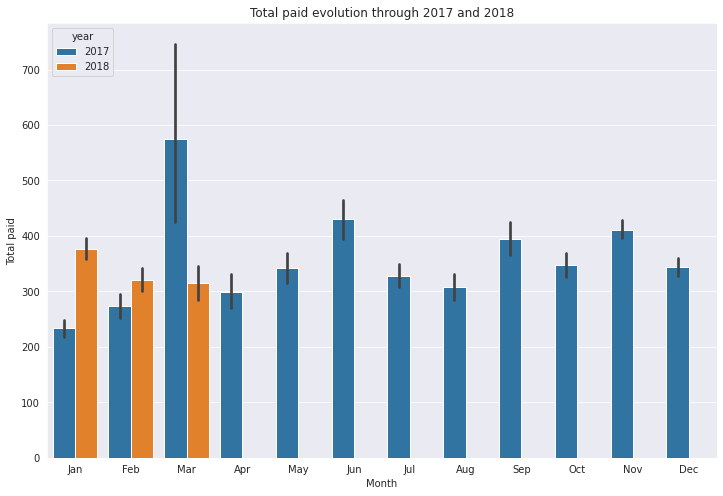

In [19]:
plt.subplots(figsize=(12, 8))

sns.barplot(data=p_df, x='month', y='total_paid', hue='year', order=months)

plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Look at the description of `?sns.barplot` to undersand more about the chart. What's the meaning of the dark lines on top of each bar?

A better way to see the distribution by month would be to use another type of chart; the boxplot. 

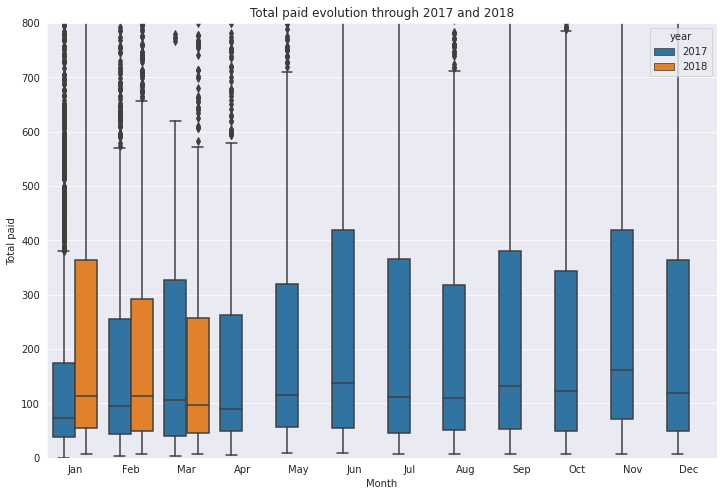

In [20]:
plt.subplots(figsize=(12, 8))

sns.boxplot(data=p_df, 
            x='month', 
            y='total_paid', 
            hue='year', 
            order=months)

plt.ylim(0, 800) # define a limit to put focus on your chart
plt.xlabel('Month')
plt.ylabel('Total paid')
plt.title('Total paid evolution through 2017 and 2018')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

What are we seeing on this chart? Well, the [boxplot](https://en.wikipedia.org/wiki/Box_plot) is a representaition of the pandas function `.describe()`. It shows the main descriptive statistics of a distribution. 

In [21]:
(
p_df
    # select this 3 columns
    .filter(['year','month','total_paid'])
    # apply the describe function to this two groups
    .groupby(['year','month'])
    .describe()
)

total_paid                                                 
                count   mean     std  min   25%    50%    75%      max
year month                                                            
2017 Apr      1632.00 298.38  614.30 4.99 49.99  89.99 262.98  9423.90
     Aug      2350.00 307.26  599.39 7.78 51.10 109.99 317.23 10586.97
     Dec      5506.00 344.63  585.87 6.98 49.98 119.98 362.97  6657.46
     Feb      2273.00 274.48  520.73 3.99 42.98  94.97 254.98  4163.98
     Jan      5111.00 233.11  522.33 0.00 37.93  72.96 174.98  7230.97
     Jul      3438.00 327.86  602.56 7.48 44.98 110.97 365.99  7216.77
     Jun      1603.00 430.47  752.93 8.89 54.98 137.98 419.98  6698.00
     Mar       202.00 573.95 1208.63 2.82 39.99 106.98 326.74  9987.76
     May      1892.00 341.52  594.72 8.98 56.25 115.00 318.96  5335.00
     Nov      7187.00 410.39  683.62 6.53 71.48 161.23 418.98 13387.78
     Oct      3135.00 346.99  610.90 6.98 49.98 122.24 344.07  6227.77
     Sep      2180.00 395.04  682.26 6.98 52.20 131.78 380.38  7376.58
2018 Feb      3334.00 320.85  587.50 6.98 49.98 113.97 292.98  6034.97
     Jan      5202.00 376.94  665.62 6.48 53.99 112.97 362.99  7268.58
     Mar      1515.00 314.77  633.07 6.98 44.98  96.98 258.04  6656.98

As you can see, most of our transactions have monthly median values around 100, but maximum values go up to 10,000 and the standard deviation is huge. So we have very different types of customers. 

A possible hypothesis is that we have a large group of low-paying customers who are end-users and a small group of 'whale' customers who are companies. What's your hypothesis?

### Revenue: zoom in January

We can zoom into the distribution of one month by filtering one month in our dataset:

In [22]:
p_df_jan = p_df.query('month == "Jan"')

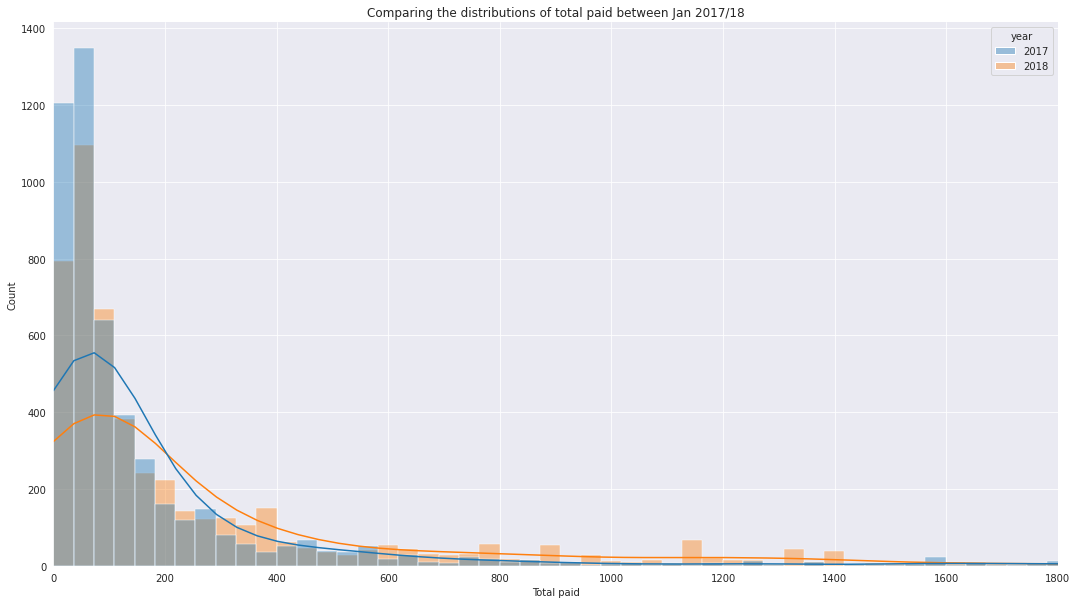

In [23]:
plt.subplots(figsize=(18, 10))

sns.histplot(data=p_df_jan, x='total_paid', hue='year', 
             alpha=.4, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=200 # define the number of bins the variable total paid will be grouped
            )
sns.set_style("white")

plt.xlim(0, 1800)
plt.title('Comparing the distributions of total paid between Jan 2017/18')
plt.xlabel('Total paid')
sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")


Looking at these distributions, we can see that in 2017 there were more orders with a smaller `total_paid`, while in 2018 we observe several spikes between 1000 and 1500, indicating that there were more expensive orders.

Let's check this hypothesis: 

In [24]:
p_df_jan.groupby('year').agg({'total_paid':['mean','median','std']})

total_paid              
           mean median    std
year                         
2017     233.11  72.96 522.33
2018     376.94 112.97 665.62

My theory is confirmed when we aggregate the data. The standard deviation for 2018 also shows us that there is a higher dispersion compared to 2017, caused mainly but these orders around 1250 euros.

Let's see if we can zoom in into the products information for January. 

In [25]:
# we already have the completed orders for January of both years in our p_df_jan, 
# let's locate them on the orderlines dataset:

p_sku_jan = (
orderlines
    .loc[orderlines['id_order'].isin(p_df_jan['order_id'])] # filter all the orders id in orderlines for month of january (2017 and 2018)
    .assign(year = orderlines['date'].dt.strftime('%Y')) # create year column
    .groupby(['year','sku']) # group by year and sku
    .agg({'unit_price':'sum'}) # aggregate using the sum of the "unit price"
    .reset_index() # reset index so "year" and "sku" become columns
    .sort_values('unit_price', ascending=False) # order by "unit price" to get top products
    .groupby('year') # group by year because we want the top products for each year
    .head(10) # get the first 10 products for each year
)
p_sku_jan

,year,sku,unit_price
2370,2018,APP2490,57099.45
2371,2018,APP2491,50301.34
2255,2018,APP2074,50154.26
2369,2018,APP2489,45337.70
2373,2018,APP2492,38541.00
2425,2018,APP2637,35826.00
3456,2018,PAC2119,25979.77
2256,2018,APP2075,23829.55
1323,2017,PAC1240,21966.00
3463,2018,PAC2136,20970.90


We can now merge these top 10 products from each year (coming from orderlines) with the products dataset, so that we can can obtain the names of those products:

In [26]:
p_sku_jan = p_sku_jan.merge(products, how='left')
p_sku_jan

,year,sku,unit_price,name,desc,price,type,max_price_orderlines
0,2018,APP2490,57099.45,Apple iPhone 64GB X Silver,New Apple iPhone 64GB Free Silver X,NaN,113271716,1159.00
1,2018,APP2491,50301.34,Apple iPhone X 256GB Space Gray,New Apple iPhone X 256GB Free Space Gray,NaN,113271716,1329.00
2,2018,APP2074,50154.26,"Apple MacBook Pro 15 ""Core i7 Touch Bar 28GHz ...",New MacBook Pro 15-inch Touch Bar to 28GHz Cor...,2805.59,"1,02E+12",NaN
3,2018,APP2489,45337.70,Apple iPhone 64GB Space Gray X,New Free iPhone 64GB X,1159.00,113271716,NaN
4,2018,APP2492,38541.00,Apple iPhone X 256GB Silver,New Apple iPhone X 256GB Silver Free,NaN,113271716,1329.00
5,2018,APP2637,35826.00,"Apple iMac Pro 27 ""8-core Intel Xeon W 32GHz |...",Pro iMac 27 inch screen Retina 5K and Intel Xe...,5499.00,118692158,NaN
6,2018,PAC2119,25979.77,"Apple iMac 27 ""Core i7 Retina 5K 42GHz | 32GB ...",IMac desktop computer 27 inch Retina 5K RAM 32...,3799.00,"5,74E+15",NaN
7,2018,APP2075,23829.55,"Apple MacBook Pro 15 ""Core i7 Touch Bar 29Ghz ...",New MacBook Pro 15-inch Core i7 Touch Bar 29Gh...,3305.59,"1,02E+12",NaN
8,2017,PAC1240,21966.00,"Apple MacBook Pro 133 ""i5 25GHz | RAM 16GB | 5...",Apple MacBook Pro 133 inches (MD101Y / A) with...,1899.00,1282,NaN
9,2018,PAC2136,20970.90,"Apple iMac 27 ""Core i5 Retina 5K 34GHz | 16GB ...",IMac desktop computer 27 inch 5K Retina 16GB (...,2339.00,"5,74E+15",NaN


Time to visualize the products:

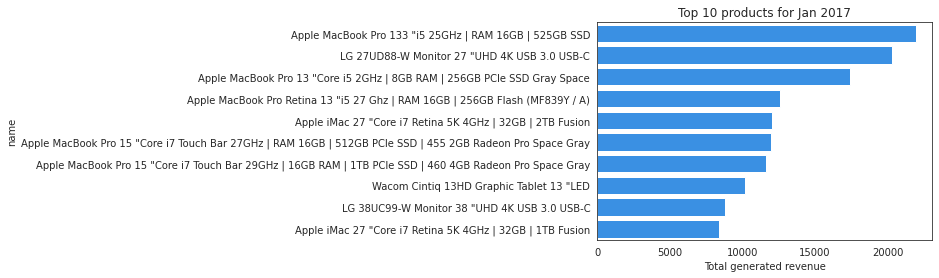

In [27]:
# data for 2017
year = "2017"
data_2017 = p_sku_jan.loc[p_sku_jan['year'] == year]

# plot for 2017
sns.barplot(data= data_2017, 
            x='unit_price', 
            y='name',
            color='dodgerblue')

plt.title('Top 10 products for Jan ' + year)
plt.xlabel('Total generated revenue')
plt.show()

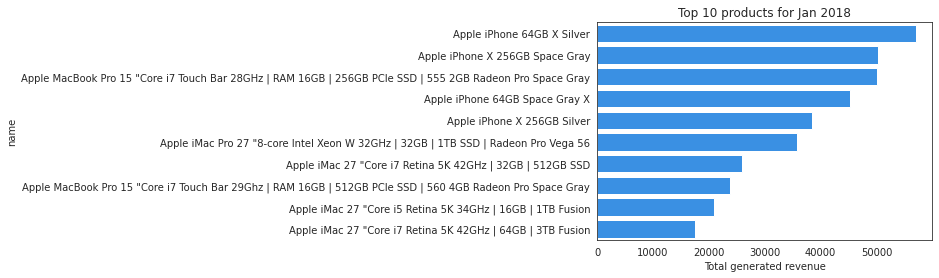

In [28]:
# data for 2018
year = "2018"
data_2018 = p_sku_jan.loc[p_sku_jan['year'] == year]

# plot for 2018
sns.barplot(data= data_2018, 
            x='unit_price', 
            y='name',
            color='dodgerblue')

plt.title('Top 10 products for Jan ' + year)
plt.xlabel('Total generated revenue')
plt.show()

Whenever you repeat a task in python with minimal changes, there's usually a way to do it with a loop. You don't need to understand the code below, but feel free to scrutinize it:

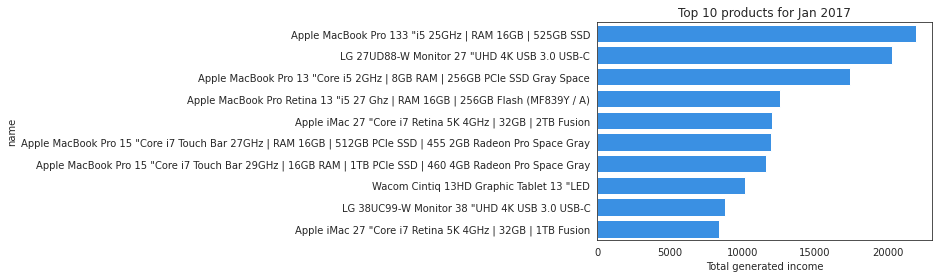

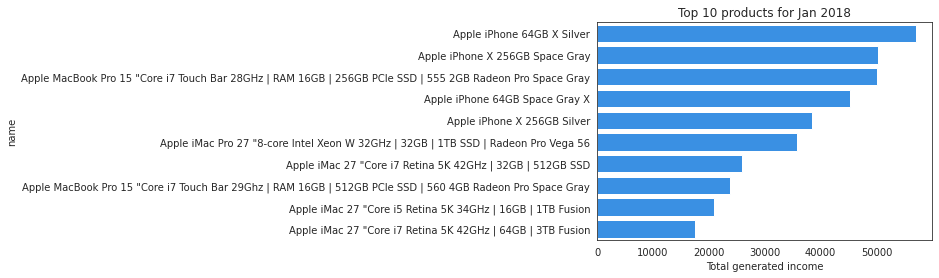

In [29]:
for year in ['2017', '2018']:
    temp = p_sku_jan.loc[p_sku_jan['year'] == year]
    sns.barplot(data=temp, x='unit_price', y='name', color='dodgerblue')
    plt.title('Top 10 products for Jan ' + year)
    plt.xlabel('Total generated income')
    plt.show()